### Hipótese 5 (KNN)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível predizer a classificação indicativa de um game baseado em seu gênero e suas vendas?

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
display(len(df.columns))
df.head()

644

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0


In [9]:
all_sales = df.iloc[:, 5:10].copy()
all_genres = df.iloc[:, 50:57].copy()

X = all_sales.join(all_genres).values.copy()
y = df["Rating"].values.copy()

In [10]:
X # Valores das vendas e generos.

array([[1.00000000e+00, 1.00000000e+00, 3.68884540e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.03094778e-01, 1.23618785e-01, 6.66340509e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.79110251e-01, 4.40607735e-01, 3.70841487e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41779497e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.78473581e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
y # Valores de Genre

array(['E', 'E', 'E', ..., 'E', 'E', 'E'], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
success = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    success.append(np.mean(pred_i == y_test))
success

[0.5942323314378554,
 0.636068237205524,
 0.6378960194963444,
 0.647238017871649,
 0.6510966693744923,
 0.6573923639317628,
 0.665718927701056,
 0.6636880584890333,
 0.6602355808285947,
 0.6596263200649878,
 0.6624695369618196,
 0.6632818846466287,
 0.6632818846466287,
 0.661251015434606,
 0.6673436230706743,
 0.6675467099918765,
 0.6663281884646629,
 0.6645004061738424,
 0.6661251015434606,
 0.6645004061738424,
 0.6661251015434606,
 0.6669374492282697,
 0.6647034930950447,
 0.6606417546709992,
 0.6614541023558083,
 0.662672623883022,
 0.6608448415922015,
 0.6602355808285947,
 0.6606417546709992,
 0.6606417546709992,
 0.6592201462225833,
 0.6600324939073924,
 0.6594232331437856,
 0.6620633631194152,
 0.6630787977254264,
 0.6630787977254264,
 0.661251015434606,
 0.6608448415922015,
 0.6640942323314378,
 0.6624695369618196,
 0.6632818846466287,
 0.6622664500406173,
 0.661251015434606,
 0.6624695369618196,
 0.6636880584890333,
 0.6640942323314378,
 0.6647034930950447,
 0.6642973192526401,

Melhor resultado: 0.6675467099918765 para o k igual a 16


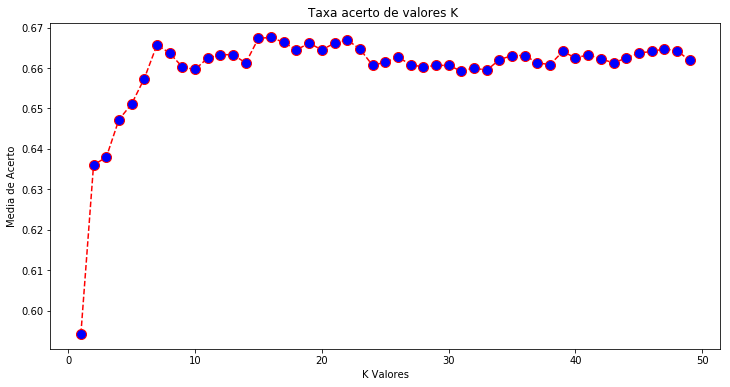

In [14]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), success, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto de valores K ')  
plt.xlabel('K Valores')  
plt.ylabel('Media de Acerto')

best_result = 0
for i in success:
    if(i > best_result):
        best_result = i
best_k_value = success.index(best_result) + 1
print("Melhor resultado:",best_result,"para o k igual a",best_k_value)

In [15]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(40, 20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [18]:
def list_string_to_list_index(list_keys, list_string):
    list_index = []
    for i in list_string:
        list_index.append(list_keys.index(i))
    return list_index;

Normalized confusion matrix


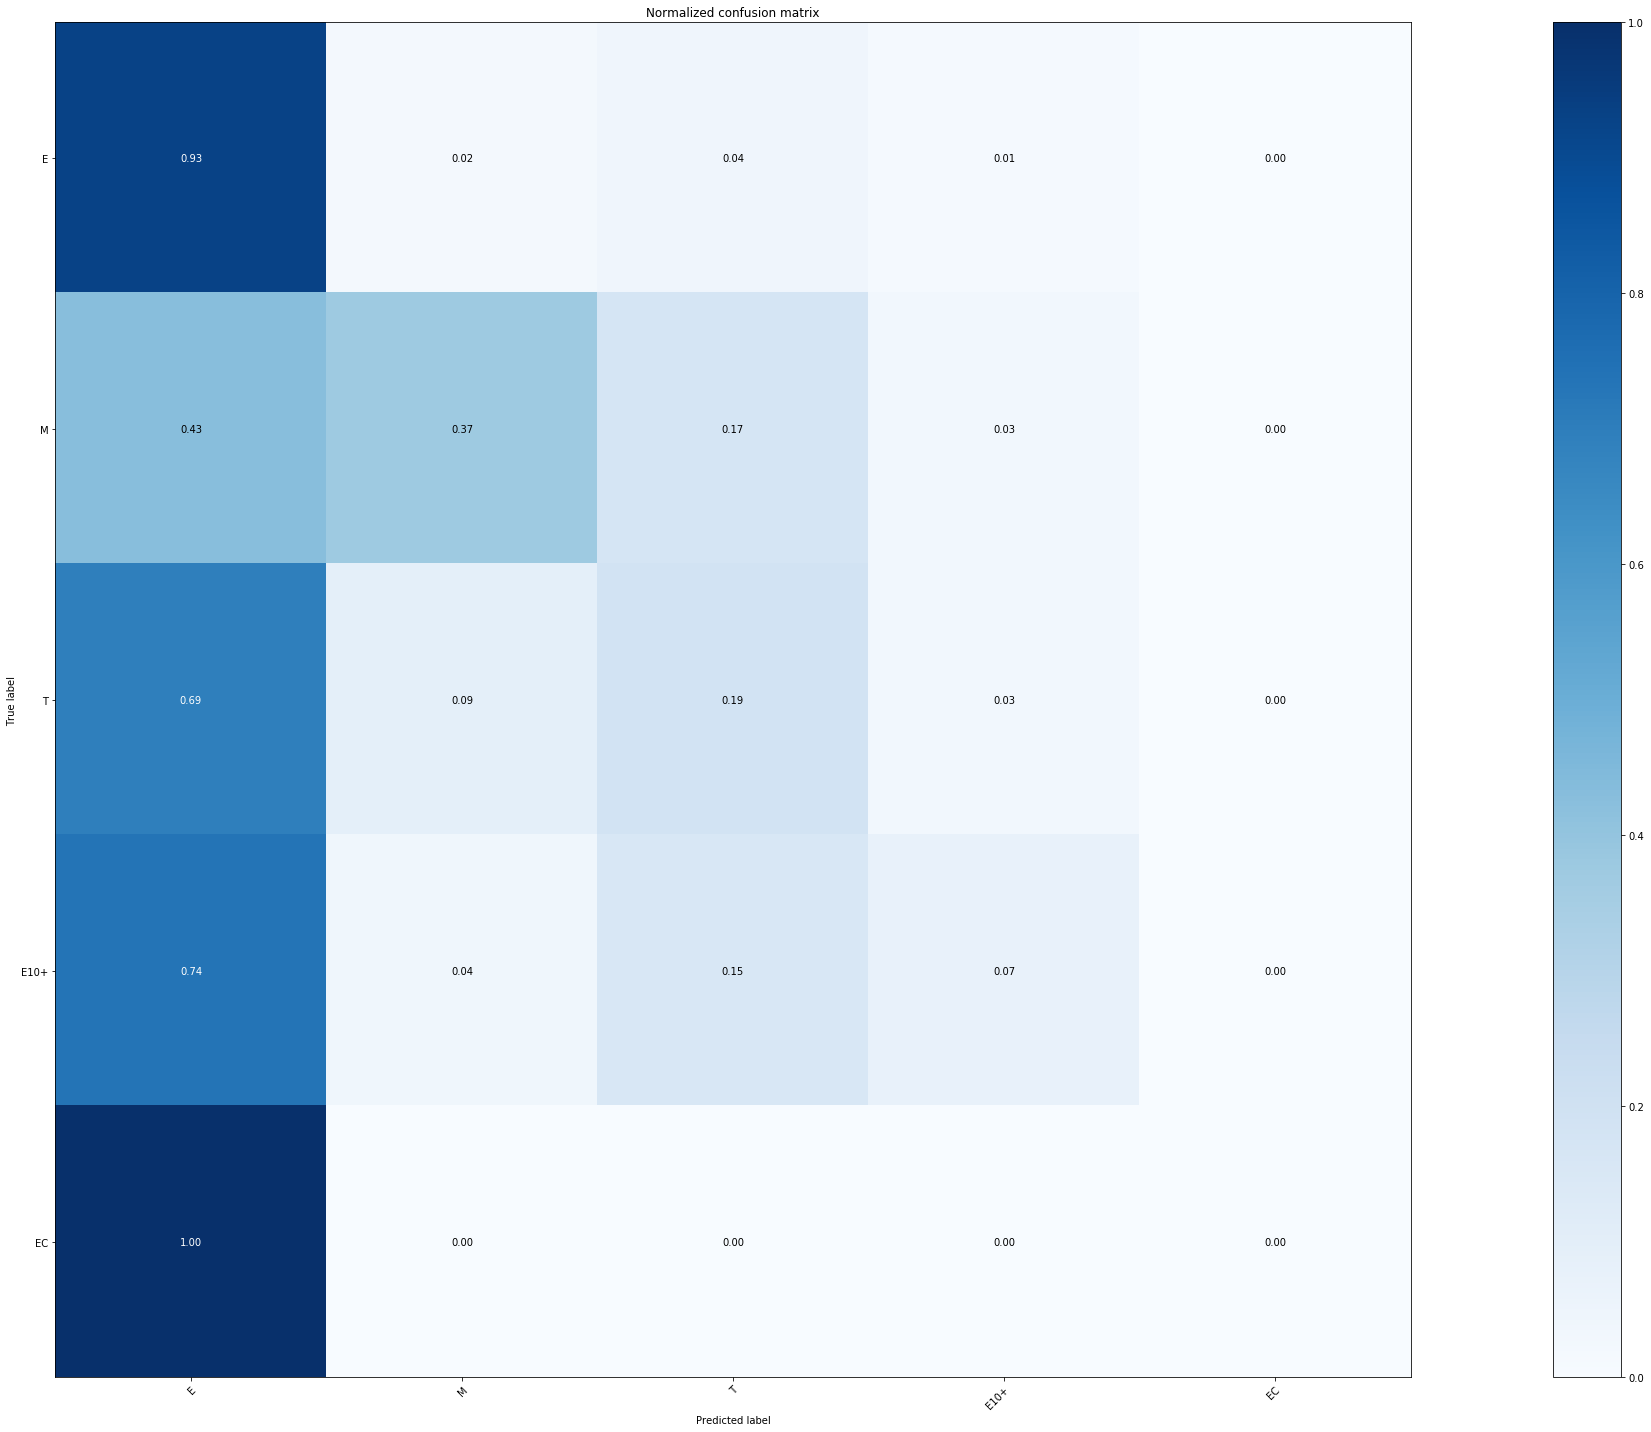

In [19]:
class_names = df["Rating"].unique()

y_test_index = list_string_to_list_index(list(class_names), y_test)
y_pred_index = list_string_to_list_index(list(class_names), y_pred)

plot_confusion_matrix(y_test_index, y_pred_index, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Conclusão

O melhor resultado que obtemos foi quando se estabelecem algo próximo à 37 vizinhos, tendo uma taxa de acerto por volta dos 67%. Com isso. conclui-se que é possível predizer a classificação indicativa de um jogo (rating), a partir do seu gênero e venda. Isso indica principalmente que, a classificação indicativa de um jogo irá influenciar nas suas vendas. Resta saber quais ratings possuem os melhores resultados de vendas historicamente.

In [20]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='ball_tree')  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [21]:
y_pred = classifier.predict(X_test)
ball_tree_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'ball_tree' foi de",ball_tree_result)

Resultado da predição com o algoritmo 'ball_tree' foi de 0.6673436230706743


In [22]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='kd_tree')  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [23]:
y_pred = classifier.predict(X_test)
kd_tree_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'kd_tree' foi de",kd_tree_result)

Resultado da predição com o algoritmo 'kd_tree' foi de 0.6675467099918765


In [24]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='brute')  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [25]:
y_pred = classifier.predict(X_test)
brute_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'brute' foi de",brute_result)

Resultado da predição com o algoritmo 'brute' foi de 0.6673436230706743


In [26]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='brute', weights='distance')  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='distance')

In [27]:
y_pred = classifier.predict(X_test)
weight_distance_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'brute' e peso 'distance' foi de",weight_distance_result)

Resultado da predição com o algoritmo 'brute' e peso 'distance' foi de 0.6586108854589764


In [28]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='brute', leaf_size=50)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [29]:
y_pred = classifier.predict(X_test)
bigger_leaf_size_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'brute' e tamanho da folha igual a 50 foi de",bigger_leaf_size_result)

Resultado da predição com o algoritmo 'brute' e tamanho da folha igual a 50 foi de 0.6673436230706743


In [30]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='brute', leaf_size=20)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [31]:
y_pred = classifier.predict(X_test)
smaller_leaf_size_result = np.mean(y_pred == y_test)
print("Resultado da predição com o algoritmo 'brute' e tamanho da folha igual a 20 foi de",smaller_leaf_size_result)

Resultado da predição com o algoritmo 'brute' e tamanho da folha igual a 20 foi de 0.6673436230706743


### Conclusão das variações no KNN

Vimos que o melhor resultado obtido até então havia sido 67,36% com o k vizinhos igual a 37. Mantendo o número de vizinhos, alteramos então o parâmetro 'algorithm', e o melhor resultado obtido foi de 67,48% quando colocou-se o algoritmo 'brute'. Depois alteramos o parâmetro 'weights' mas o resultado piorou um pouco para 66,34%. Depois aumentamos e diminuimos o valor do parâmetro 'leaf_size', mas não houve melhoras significativas.

Concluimos então que a melhor configuração do KNN para este caso foi a seguinte:

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=2,
           weights='uniform')

Score: 0.6673436230706743


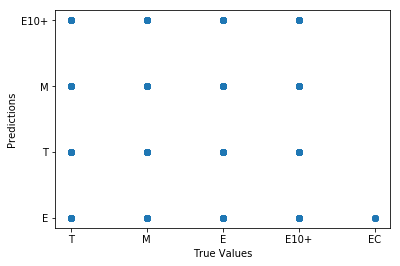

In [32]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value, algorithm='brute')  
model = classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", model.score(X_test, y_test))

In [33]:
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)

/home/joaopaulo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


Cross-validated scores: [0.44687842 0.41447368 0.42303473 0.39978054 0.43635699 0.6481346 ]


/home/joaopaulo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


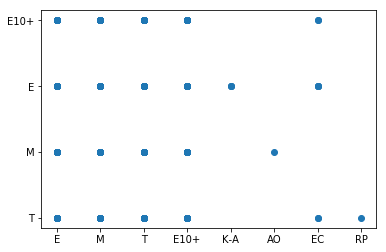

In [34]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)